In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [2]:
import numpy as np
import cv2
import imutils
import pytesseract
from google.colab.patches import cv2_imshow

Originial image:


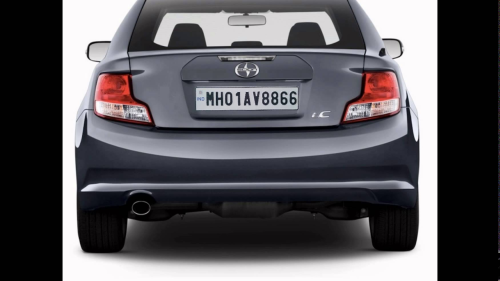

-1

In [3]:
# Read the image file
image = cv2.imread('/content/img.jpg')

# Resize the image - change width to 500
image = imutils.resize(image, width=500)

# Display the original image
print("Originial image:")
cv2_imshow(image)
cv2.waitKey(0)

1 - Grayscale Conversion


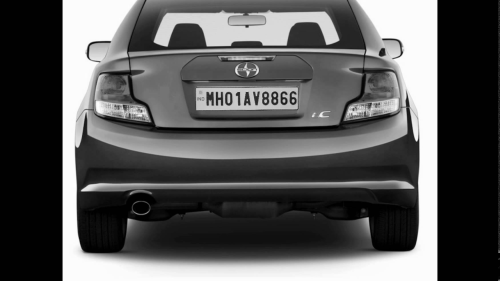

-1

In [4]:
# RGB to Gray scale conversion
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("1 - Grayscale Conversion")
cv2_imshow(gray)
cv2.waitKey(0)

2 - Bilateral Filter


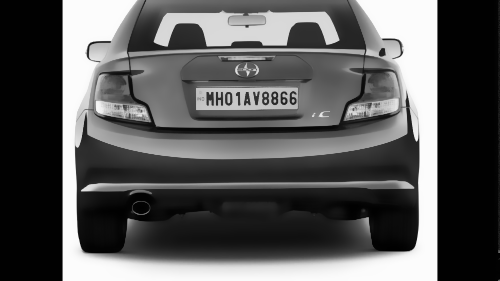

-1

In [5]:
# Noise removal with iterative bilateral filter(removes noise while preserving edges)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
print('2 - Bilateral Filter')
cv2_imshow(gray)
cv2.waitKey(0)

3 - Canny Edges


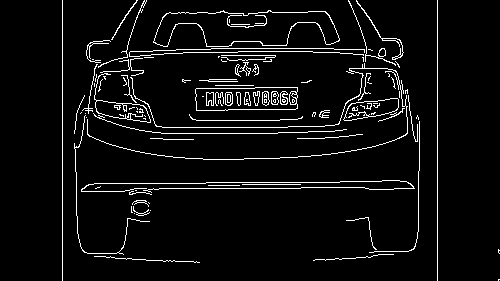

-1

In [6]:
# Find Edges of the grayscale image
edged = cv2.Canny(gray, 170, 200)
print("3 - Canny Edges")
cv2_imshow(edged)
cv2.waitKey(0)

4- All Contours


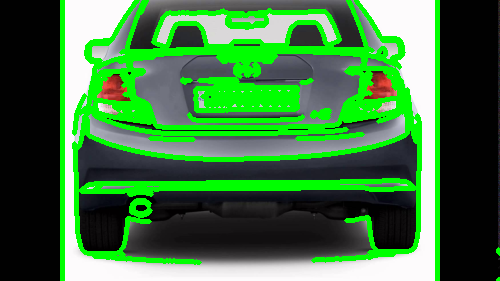

-1

In [7]:
# Find contours based on Edges
cnts, new  = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Create copy of original image to draw all contours
img1 = image.copy()
cv2.drawContours(img1, cnts, -1, (0,255,0), 3)
print("4- All Contours")
cv2_imshow(img1)
cv2.waitKey(0)

5- Top 30 Contours


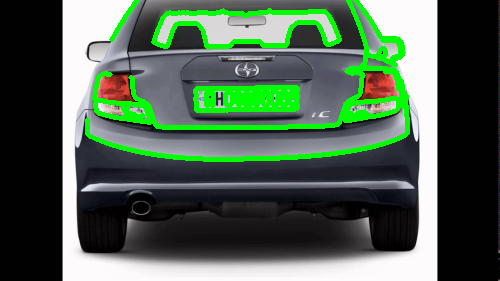

-1

In [8]:
#sort contours based on their area keeping minimum required area as '30' (anything smaller than this will not be considered)
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30]
NumberPlateCnt = None #we currently have no Number plate contour
# Top 30 Contours
img2 = image.copy()
cv2.drawContours(img2, cnts, -1, (0,255,0), 3)
print("5- Top 30 Contours")
cv2_imshow(img2)
cv2.waitKey(0)

In [9]:
# loop over our contours to find the best possible approximate contour of number plate
count = 0
for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        # print ("approx = ",approx)
        if len(approx) == 4:  # Select the contour with 4 corners
            NumberPlateCnt = approx #This is our approx Number Plate Contour

            # Crop those contours and store it as Cropped Image
            x, y, w, h = cv2.boundingRect(c) #This will find out co-ord for plate
            new_img = gray[y:y + h, x:x + w] #Create new image
            cv2.imwrite('Cropped.png', new_img) #Store new image
            break

Final Image With Number Plate Detected


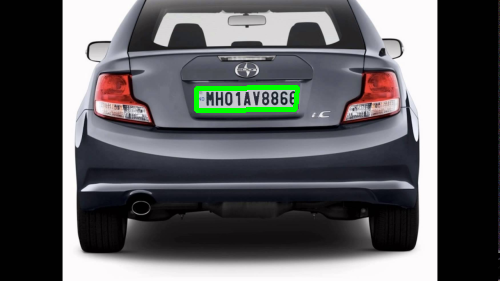

-1

In [10]:
# Drawing the selected contour on the original image
#print(NumberPlateCnt)
cv2.drawContours(image, [NumberPlateCnt], -1, (0,255,0), 3)
print("Final Image With Number Plate Detected")
cv2_imshow(image)
cv2.waitKey(0)

In [11]:
Cropped_img_loc = '/content/Cropped.png'
print("Cropped Image")
cv2_imshow(cv2.imread(Cropped_img_loc))

Cropped Image


In [13]:
# Use tesseract to covert image into string
text = pytesseract.image_to_string(Cropped_img_loc, lang='eng', config='--psm 6')
print("License plate number :", text)

License plate number : MHO1AV8866

